# PD notebook for data exploration
## This notebook is exploring a dataset found on https://data.world/data-society/used-cars-data, which contains data scraped from classified adverts on eBay Germany

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('autos.csv', encoding='latin-1')

In [3]:
df.shape

(371537, 20)

In [4]:
df.head(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24/03/2016 11:52,Golf_3_1.6,private,Angebot,480,test,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,A5_Sportback_2.7_Tdi,private,Angebot,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46


#### Changing camelCase column names to snake_case for ease of reading

In [5]:
df.rename(columns={'dateCrawled': 'date_crawled', 'offerType': 'offer_type', 'vehicleType': 'vehicle_type', 'yearOfRegistration': 'registration_year', 'powerPS': 'power_PS', 'kilometer': 'odometer_km', 'monthOfRegistration': 'registration_month', 'fuelType': 'fuel_type', 'notRepairedDamage': 'unrepaired_damage', 'dateCreated':'ad_created', 'nrOfPictures': 'nr_of_pictures', 'postalCode': 'postal_code', 'lastSeen': 'last_seen'}, inplace=True)

#### Print the new data frame to check for next cleaning steps

In [6]:
df.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,371537,371537,371537,371537,3.715370e+05,371537,333668,371537.000000,351328,371537.000000,351053,371537.000000,371537.000000,338151,371537,299477,371537,371537.0,371537.000000,371537
unique,15622,233389,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,18705
top,05/03/2016 14:25,Ford_Fiesta,private,Angebot,NaN,test,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,no,03/04/2016 00:00,NaN,NaN,07/04/2016 06:45
freq,68,657,371534,371525,NaN,192591,95896,NaN,274219,NaN,30070,NaN,NaN,223863,79640,263189,14451,NaN,NaN,708
mean,NaN,NaN,NaN,NaN,1.729549e+04,NaN,NaN,2004.577883,NaN,115.549151,NaN,125618.161852,5.734473,NaN,NaN,NaN,NaN,0.0,50820.666402,NaN
std,NaN,NaN,NaN,NaN,3.587910e+06,NaN,NaN,92.865496,NaN,192.137403,NaN,40112.919387,3.712383,NaN,NaN,NaN,NaN,0.0,25799.080292,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.000000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.000000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.000000,NaN


#### Results:
- "nr_of_pictures" is 0 for all entries, it can be dropped from the dataframe.
- "registration_month" isn't needed, the year of registration is accurate enough for analysis.
- "name" will be dropped - it contains information of some value, however it isn't in a consistent format so will be hard to use. We already have make, model, engine power, and age in other columns which is most of the same information.
- Other columns which are irrelevant and can be dropped:
  - "seller" is all "private"
  - "offer_type" is all "Angebot" (Offer)
  - "date_crawled" 
  - "ad_created"
  - "last_seen"

#### Since the data set has so many points, lines with null values can be dropped while still maintaining a sufficiently large data set for analysis

In [7]:
columns_to_drop = ['nr_of_pictures', 'name', 'registration_month', 'seller', 'offer_type', 'date_crawled', 'ad_created', 'last_seen', 'abtest']
df.drop(columns_to_drop, axis=1, inplace=True)
df.dropna(inplace=True)

In [8]:
df.describe(include='all')

,price,vehicle_type,registration_year,gearbox,power_PS,model,odometer_km,fuel_type,brand,unrepaired_damage,postal_code
count,2.609650e+05,260965,260965.000000,260965,260965.000000,260965,260965.000000,260965,260965,260965,260965.000000
unique,NaN,8,NaN,2,NaN,250,NaN,7,39,2,NaN
top,NaN,sedan,NaN,manual,NaN,golf,NaN,petrol,volkswagen,no,NaN
freq,NaN,76396,NaN,200064,NaN,20958,NaN,169248,54194,232953,NaN
mean,8.209431e+03,NaN,2003.309382,NaN,126.331531,NaN,124057.977123,NaN,NaN,NaN,51818.674995
std,3.433034e+05,NaN,6.512486,NaN,145.275389,NaN,39848.992196,NaN,NaN,NaN,25843.424220
min,0.000000e+00,NaN,1910.000000,NaN,0.000000,NaN,5000.000000,NaN,NaN,NaN,1067.000000
25%,1.500000e+03,NaN,1999.000000,NaN,78.000000,NaN,100000.000000,NaN,NaN,NaN,31226.000000
50%,3.850000e+03,NaN,2004.000000,NaN,116.000000,NaN,150000.000000,NaN,NaN,NaN,51103.000000
75%,8.600000e+03,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,NaN,NaN,NaN,72766.000000


#### Overview
Some of these data are incorrect. 
- Year of registration: The dataset originates from 2016, so no years of registration beyond that are valid. The oldest is 1910 which is possible.
- Power PS: Engine power ranges from 0 to 20,000. 0 is impossible since a vehicle with no power cannot move. 20,000 is also far too high. A limit of 1,000 will be applied, which is far beyond most production cars. While a very small number are above this, little data will be lost and it would be anomalous anyway in terms of price etc.
- Price: A price of € 0, if valid, will be due to some other detail in the description that has not been scraped (e.g. swap for something else, or fines tied to the vehicle close to its value etc). Also a price over € 1,000,000 is an extreme case likely due to some other factor (e.g. specific vehicle history like a movie prop). Anything below € 100 or above € 1,000,000 will be dropped.



In [9]:
df = df[(df['registration_year'] <= 2016) & (df['power_PS'].between(1, 1000)) & (df['price'].between(100, 1000000))]

Now we have removed the anomalous data, we can start examining the remaining data. We will start by calculating the average values for price, power, year, and odometer for each brand, and storing them in a dictionary.
We will also filter to include only the 15 most commonly occurring brands to ensure lost of data points for each, and reduce the total number of categories.

In [61]:
top_brands = df["brand"].value_counts().index[0:15]
df = df[df["brand"].isin(top_brands)]

brands = df["brand"].unique()

brand_average_values = {}
categories = ["price", "registration_year", "odometer_km", "power_PS"]

for brand in brands:
    brand_average_values[brand] = {}
    for category in categories:
        brand_average_values[brand][category] = {
            "mean": int(df[df["brand"] == brand][category].mean()),
            "median": int(df[df["brand"] == brand][category].median()),
            "mode": int(df[df["brand"] == brand][category].mode()[0]),
            "std_dev": int(df[df["brand"] == brand][category].std()),
        }



In [78]:
from pprint import pprint

mean_price_list = []
for key in brand_average_values.keys():
    mean_price_list.append((key, (brand_average_values[key]["price"]["mean"])))

mean_power_list = []
for key in brand_average_values.keys():
    mean_power_list.append((key, (brand_average_values[key]["power_PS"]["mean"])))

print(mean_price_list)
print(mean_power_list)




dict_keys(['price', 'registration_year', 'odometer_km', 'power_PS'])
[('volkswagen', 6408), ('skoda', 7156), ('bmw', 9502), ('peugeot', 3751), ('mazda', 4781), ('nissan', 5570), ('renault', 2984), ('ford', 4481), ('mercedes_benz', 9580), ('seat', 5262), ('fiat', 3420), ('audi', 10338), ('opel', 3554), ('citroen', 4208), ('toyota', 5729)]
[('volkswagen', 109), ('skoda', 108), ('bmw', 176), ('peugeot', 101), ('mazda', 121), ('nissan', 109), ('renault', 92), ('ford', 108), ('mercedes_benz', 169), ('seat', 101), ('fiat', 80), ('audi', 168), ('opel', 102), ('citroen', 97), ('toyota', 111)]


In [89]:
data = {
    'brand': [],
    'price_mean': [],
    'registration_year_mean': [],
    'odometer_km_mean': [],
    'power_PS_mean': []
}

for brand, categories in brand_average_values.items():
    data['brand'].append(brand)
    data['price_mean'].append(categories['price']['mean'])
    data['registration_year_mean'].append(categories['registration_year']['mean'])
    data['odometer_km_mean'].append(categories['odometer_km']['mean'])
    data['power_PS_mean'].append(categories['power_PS']['mean'])

df_mean = pd.DataFrame(data)
df_mean.sort_values(by="registration_year_mean", ascending=False)

,brand,price_mean,registration_year_mean,odometer_km_mean,power_PS_mean
1,skoda,7156,2007,111194,108
9,seat,5262,2005,116591,101
3,peugeot,3751,2004,121561,101
11,audi,10338,2004,126880,168
13,citroen,4208,2004,118165,97
14,toyota,5729,2004,115717,111
0,volkswagen,6408,2003,125742,109
2,bmw,9502,2003,131518,176
4,mazda,4781,2003,122802,121
5,nissan,5570,2003,116112,109


- Sorting by price_mean, we can see that the top 5 brands with the highest mean price are all German. 4 of the bottom 5 are owned by Stellantis, a predominantly European based multinational. 

- Sorting by power_PS_mean shows that most fit within the envelope of 100 +/- 10 PS, indicating the tendency for smaller, more economical vehicles in Europe. The exceptions are the top 3 brands, BMW, Mercedes, and Audi, who tend towards more premium vehicles with higher performance, and higher price. At the bottom end is Fiat, who produce a lot of mini sized vehicles for cities etc.

- Sorting by odometer_km_mean shows the results correlate somewhat with the price and power, so higher power and priced vehicles have higher odometer readings. This could be as a result of higher reliability and longevity in the more premium vehicles, or the higher value meaning that owners are more inclined to keep and maintain the vehicles rather than scrapping them and replacing.

<Axes: xlabel='price', ylabel='power_PS'>

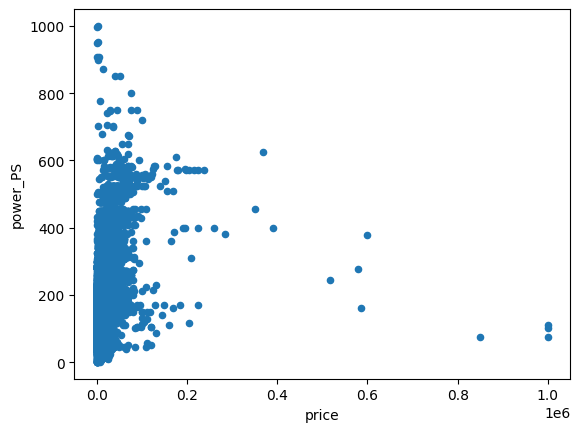

In [114]:
# num_columns = ["price", "registration_year", "power_PS", "odometer_km"]
# for col in num_columns:
#     for col2 in num_columns:
#       print(df[col].corr(df[col2]))

# print(df["price"].corr(df["odometer_km"]))
numeric_df = df.select_dtypes(include='number')
correlation_table = numeric_df.corr().style.background_gradient(cmap='coolwarm')
correlation_table

numeric_df.plot.scatter(x="price",y="power_PS")